Welcome everyone to lab one. This worksheep will guide you to everything that you need including instructions, the questions and definitely the bonus questions for your extra scores. Before we start with anything, please fill in your information here so we can give you nice some nice scores later. 

- Member1:
- Member2: 
- Member3: 
- Member4: 

Please try to elaborate this exercise with the lectures from the first week. The goal of this lab is for you to enjoy mass spectrometry data much more. MS is absolutely an intrigueing technology. In other words, it is not that simple to understand it with in a few minutes but we are here to explore them all together. Nevertheless, we try to reduce several steps into just a simple exercise. 

## Intended learning outcomes (ILOs)

On completion of the lab, the student should be able to:

1. Demonstrate understandings and insights in mass spectrometry
2. Retrieve open access mass spectrometry data
3. Access organism proteome from database 
4. Identify the relevant issues of complexity in high-throughput data structure from mass spectrometry
5. Demonstrate capacity to store and handle high throughput data with efficiency 

## Let's start! 

We have created a simple exercise for you on <https://github.com/thanadol-git/bc_25>. Please try to follow it along with answering the questions here. The teachers will try to help you in the class so don't worry if it looks a bit difficult. We are always here to help. 

You may learn a bit about mass spectrometry from Fredrik. Now, we are touching a real dataset. First look at the SDRF file. Here is the [link](https://www.cell.com/cancer-cell/fulltext/S1535-6108(22)00274-4?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1535610822002744%3Fshowall%3Dtrue) to the main article.

## Q1. 
**What do you see in the SDRF file? How many samples are there?** 

Ans.

## Q2.
**What is PRIDE accession ID for this dataset? Summarise the experiment in a short paragraph (<100 words).**

Ans. 

## Q3. 
**What samples were used and located in the organism/s in this experiment?**

Ans.

## Q4.
**What is the model of the instrument? What is its set-up? Is it labelled or labelled-free quantification?**

Ans. 


In [1]:
# libraries 
import numpy as np
import pandas as pd
# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# sklearn

In [33]:
# Download the results 

## SDRF
sdrf = pd.read_csv('cell_metadata_scbc25.sdrf.tsv', sep='\t')
## DIANN report
diann_report = pd.read_csv('diannsummary/diann_report.unique_genes_matrix.tsv', sep='\t')


## Q5. 
**What do you see in the report file? What are the columns and the rows** 



In [34]:
# Dynamic range

# pivot longer of all column  except Genes as `samples`
diann_report_long = diann_report.melt(id_vars=['Genes'], var_name='Samples', value_name='Intensity')

diann_report_long.head()

,Genes,Samples,Intensity
0,A2M,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
1,AAAS,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
2,AACS,190529_5510_007ZV_00BL5_M03_S_1.mzML,642.702
3,AAGAB,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN
4,AAK1,190529_5510_007ZV_00BL5_M03_S_1.mzML,NaN


In [35]:
n_samples = diann_report_long['Samples'].nunique()
# print 
print(f'Number of samples: {n_samples}')

Number of samples: 61


In [36]:
# Count missing values for each genes
missing_values = diann_report_long.groupby('Genes')['Intensity'].apply(lambda x: x.isna().sum()).reset_index()
# rename Intensity to Missing
missing_values.rename(columns={'Intensity': 'Missing'}, inplace=True)
# remove Missing is zero
# missing_values = missing_values[missing_values['Missing'] > 0]
# sort by Missing   
missing_values.sort_values(by='Missing', ascending=False, inplace=True)
# reset index
missing_values.reset_index(drop=True, inplace=True)

# Calculate percentage of missing values
missing_values['Percentage'] = (missing_values['Missing'] / n_samples) * 100

missing_values.head()


,Genes,Missing,Percentage
0,SPANXB1,60,98.360656
1,SAA1,60,98.360656
2,MGAM,60,98.360656
3,CALML5,60,98.360656
4,COCH,60,98.360656


## Q6. 
**How many genes that are always being detected in this experiment?** 


In [ ]:
# Filter missing genes
# Use 50% rule
selected_genes = missing_values[missing_values['Percentage'] <= 50]['Genes'].tolist()
print(selected_genes)

# Filter diann_report_long for selected genes
diann_report_long_filtered = diann_report_long[diann_report_long['Genes'].isin(selected_genes)]

# impute missing values with 0
diann_report_long_filtered['Intensity'].fillna(0, inplace=True)

diann_report_long_filtered.head()


['SURF1', 'CYBRD1', 'RPE', 'TNKS', 'SRXN1', 'PHF2', 'DHRS1', 'GLIPR2', 'CDCA5', 'CRYBG1', 'ATXN2', 'TTYH3', 'PLGRKT', 'SERPINB1', 'NFATC2IP', 'DHTKD1', 'RFTN1', 'RAB11FIP5', 'TPM2', 'IGF2BP1', 'PTPRJ', 'GNB4', 'SEC24D', 'MEF2B', 'PDLIM2', 'NFKB1', 'STX17', 'ERAP2', 'PLIN2', 'KIF20A', 'F5', 'ANKHD1', 'TMEM126B', 'ZNF787', 'DCAF8', 'AAMP', 'EFL1', 'GCA', 'HIP1', 'LPCAT2', 'PTDSS2', 'FAM20B', 'LRRK1', 'ARL6IP4', 'RPS6KA3', 'LRRC34', 'CRAT', 'P3H3', 'CUSTOS', 'EIF2D', 'TGM2', 'DHX33', 'QPRT', 'NOM1', 'MFN1', 'PDSS2', 'SFN', 'ARHGDIB', 'PSMG2', 'GTF3C4', 'PDZD11', 'NOL3', 'UMODL1', 'SLC4A2', 'TRMT2A', 'TRMT6', 'RELL1', 'PRXL2A', 'SUDS3', 'SKIC2', 'SLC39A14', 'MEAK7', 'CCDC9', 'FILIP1L', 'MPHOSPH6', 'DCUN1D1', 'PHLDB1', 'MGST1', 'TMEM192', 'LUC7L', 'BTN3A3', 'TMEM33', 'CLASP1', 'PCCA', 'UBE2R2', 'ACAP2', 'APIP', 'DHRS7B', 'EHD2', 'VMA21', 'HMGA2', 'ZFAND1', 'LYPLAL1', 'PATL1', 'AP1M1', 'SMN1', 'KAT7', 'MYO6', 'COL4A2', 'SAP30', 'SMARCA1', 'NAGLU', 'EIPR1', 'LRRC8A', 'VPS72', 'CD276', 'MAN2A1

/tmp/ipykernel_511504/451463813.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diann_report_long_filtered['Intensity'].fillna(0, inplace=True)
/tmp/ipykernel_511504/451463813.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diann_report_long_filtered['Intensity'].fillna(0, inplace=True)


,Genes,Samples,Intensity
1,AAAS,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00
3,AAGAB,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00
4,AAK1,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00
6,AAMP,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00
7,AARS1,190529_5510_007ZV_00BL5_M03_S_1.mzML,9183.15
...,...,...,...
300053,ZNRF2,200124_B5-13-T1-1_00Q49_00QMB_M03_S_1.mzML,0.00
300054,ZPR1,200124_B5-13-T1-1_00Q49_00QMB_M03_S_1.mzML,586.91
300055,ZRANB2,200124_B5-13-T1-1_00Q49_00QMB_M03_S_1.mzML,2656.07
300057,ZW10,200124_B5-13-T1-1_00Q49_00QMB_M03_S_1.mzML,0.00


In [47]:
# Join with sdrf
dr_plot_join = diann_report_long_filtered.merge(sdrf, left_on='Samples', right_on='comment[data file]', how='left')

# filter only non zero intensity
dr_plot = dr_plot_join[dr_plot_join['Intensity'] > 0]

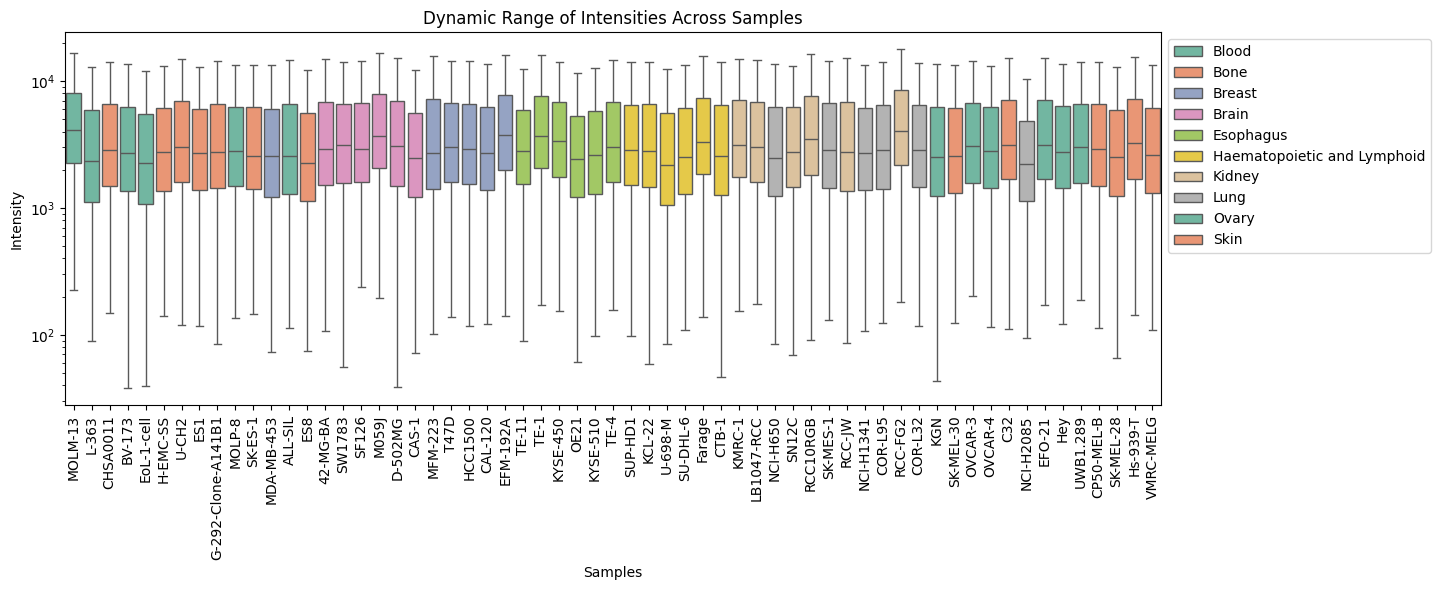

In [48]:
# Plot the dynamic range
plt.figure(figsize=(12, 6))
sns.boxplot(data=dr_plot, x='factor value[cell line]', y='Intensity', hue = 'characteristics[organism part]',
            palette='Set2', showfliers=False)
plt.xticks(rotation=90)
plt.title('Dynamic Range of Intensities Across Samples')
plt.xlabel('Samples')
plt.ylabel('Intensity')
plt.tight_layout()
plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [49]:
dr_plot_join.head()

,Genes,Samples,Intensity,source name,characteristics[organism],characteristics[organism part],characteristics[sampling site],characteristics[age],characteristics[developmental stage],characteristics[sex],...,comment[technical replicate],comment[instrument],comment[instrument identifier],comment[cleavage agent details],comment[modification parameters],comment[precursor mass tolerance],comment[fragment mass tolerance],comment[MS1 scan range],comment[MS2 scan range],factor value[cell line]
0,AAAS,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13
1,AAGAB,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13
2,AAK1,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13
3,AAMP,190529_5510_007ZV_00BL5_M03_S_1.mzML,0.00,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13
4,AARS1,190529_5510_007ZV_00BL5_M03_S_1.mzML,9183.15,PXD030304-Sample-1563,Homo sapiens,Blood,Peripheral blood,20Y,Adult,Male,...,1,NT=TripleTOF 6600;AC=MS:1002533,M02,AC=MS:1001251;NT=Trypsin,NT=Carbamidomethyl;AC=UNIMOD:4;TA=C;MT=Fixed,40 ppm,40 ppm,400m/z-1250m/z,100m/z-2000m/z,MOLM-13


In [62]:
# Find average intensity per genes
avg_intensity = dr_plot.groupby('Genes')['Intensity'].mean().reset_index()
# Sort by average intensity
avg_intensity.sort_values(by='Genes', ascending=True, inplace=True)
# Reset index
avg_intensity.reset_index(drop=True, inplace=True)  
avg_intensity.head(100)

,Genes,Intensity
0,AAAS,1964.094151
1,AAGAB,944.471333
2,AAK1,1338.701343
3,AAMP,1171.988290
4,AARS1,8146.113500
...,...,...
95,AHNAK,70081.389344
96,AHNAK2,8118.368736
97,AHSA1,5344.981197
98,AHSG,1782.415592


In [55]:
# Find average expression per tissue
avg_intensity_tissue = dr_plot.groupby(['Genes', 'characteristics[organism part]'])['Intensity'].mean().reset_index()
#reanme column Intensity to Average_Intensity
avg_intensity_tissue.rename(columns={'Intensity': 'Average_Tissue_Intensity'}, inplace=True)

avg_intensity_tissue.head()

,Genes,characteristics[organism part],Average_Tissue_Intensity
0,AAAS,Blood,1084.777500
1,AAAS,Bone,2121.685000
2,AAAS,Brain,2225.826000
3,AAAS,Breast,2435.451667
4,AAAS,Esophagus,2974.300000


In [70]:
# Calculate tissue ratio of average in each gene

# join avg_intensity with avg_intensity_tissue
avg_intensity_joined = avg_intensity.merge(avg_intensity_tissue, on='Genes', how='left')

# Calculate ratio
avg_intensity_joined['Tissue_Ratio'] = avg_intensity_joined['Average_Tissue_Intensity'] / avg_intensity_joined['Intensity']
# Filter ratio greater than 2
avg_intensity_joined = avg_intensity_joined[avg_intensity_joined['Tissue_Ratio'] > 3]
avg_intensity_joined.head()

,Genes,Intensity,characteristics[organism part],Average_Tissue_Intensity,Tissue_Ratio
665,ACYP1,1946.039459,Lung,6724.577500,3.455520
1149,AKR1B1,15155.939661,Kidney,60519.060000,3.993092
1255,ALDH4A1,4300.933056,Breast,16805.296667,3.907361
1283,ALDH7A1,10061.861960,Bone,35807.300000,3.558715
1756,APOL2,3348.251043,Haematopoietic and Lymphoid,27720.200000,8.279009


In [ ]:
# Look at your tissue 
tissue = 'Skin'
# Filter by tissue
avg_intensity_joined_skin = avg_intensity_joined[avg_intensity_joined['characteristics[organism part]'] == tissue]
# Sort by Tissue_Ratio
avg_intensity_joined_skin


,Genes,Intensity,characteristics[organism part],Average_Tissue_Intensity,Tissue_Ratio
2357,ATOX1,3164.108298,Skin,9898.134000,3.128254
5839,CRYBG1,2134.117226,Skin,7932.840000,3.717153
8782,EPPK1,8309.315472,Skin,37852.600000,4.555441
11184,GSN,8404.410390,Skin,28867.386667,3.434790
14106,LGALS3,38115.138200,Skin,145760.450000,3.824214


# Look at HPA


In the search box, you can search multiple genes with this simple syntax:
```
gene_name:ACE2, INS
```

## Q7. 
**From HPA, do you see evidences of the tissue location?** 
Ans. 

## Q8. 
**Similarly, what can be the marker for your cell line?**


/tmp/ipykernel_511504/4170387935.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dr_plot_join_skin, x='factor value[cell line]', y='Intensity', hue='Genes',


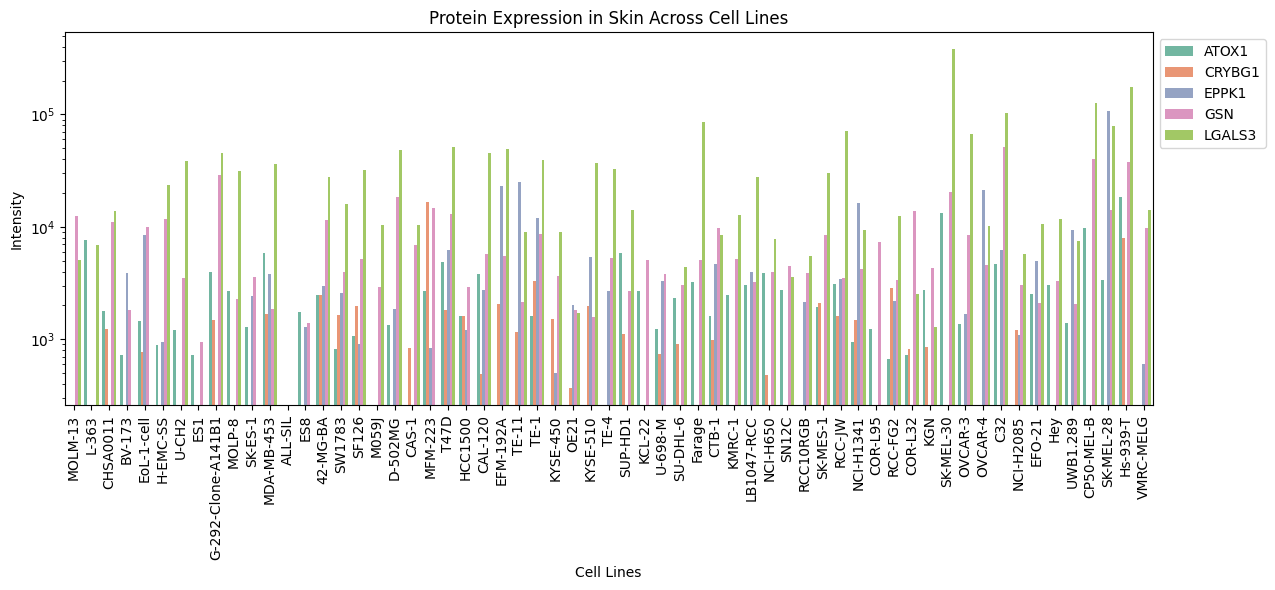

In [78]:
# Visualize protein expression for your markers

# Filter with your avg_intensity_joined_skin['Genes'] from dr_plot_join
dr_plot_join_skin = dr_plot_join[dr_plot_join['Genes'].isin(avg_intensity_joined_skin['Genes'].tolist())]
# Reorder by Intensity
dr_plot_join_skin

# Dot plot of the markers in each cell line
plt.figure(figsize=(12, 6))
sns.barplot(data=dr_plot_join_skin, x='factor value[cell line]', y='Intensity', hue='Genes', 
            palette='Set2', ci=None)  # ci=None removes error bars
plt.xticks(rotation=90)
plt.title(f'Protein Expression in {tissue} Across Cell Lines')
plt.xlabel('Cell Lines')
plt.ylabel('Intensity')
plt.tight_layout()
plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [88]:

order = sdrf['factor value[cell line]'].unique().tolist()

/home/thanadol/Documents/GitHub/BC_25/env/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/thanadol/Documents/GitHub/BC_25/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/thanadol/Documents/GitHub/BC_25/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/thanadol/Documents/GitHub/BC_25/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/thanadol/Documents/GitHub/BC_25/env/lib/python3.10/site-packages/seaborn/axisgrid.py:854: Fut

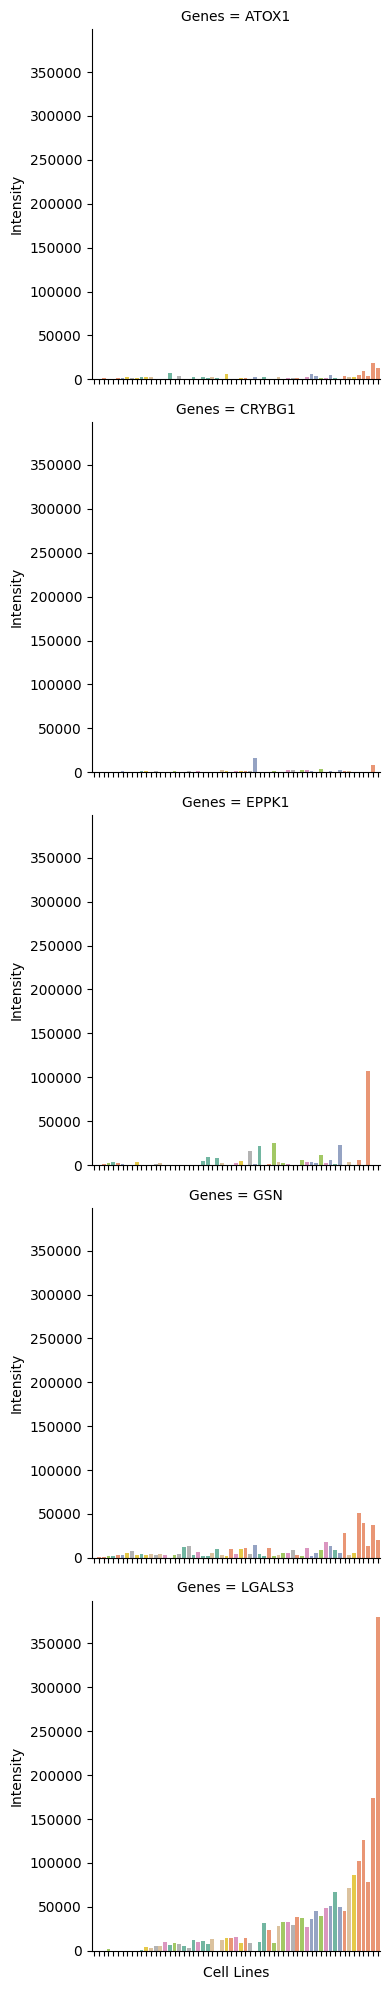

In [92]:
# Determine the order of 'factor value[cell line]' based on the desired logic (e.g., mean Intensity)
# order = dr_plot_join_skin.groupby("factor value[cell line]")["Intensity"].mean().sort_values().index

# Facet the bar plot by Genes and color by characteristics[organism part]
g = sns.FacetGrid(dr_plot_join_skin, col="Genes", col_wrap=1, sharey=True, height=4)
g.map(sns.barplot, "factor value[cell line]", "Intensity", "characteristics[organism part]", 
      order=order, ci=None, palette="Set2")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Cell Lines", "Intensity")
# g.set(yscale="log")  # Set y-axis to log scale
g.fig.tight_layout()
# 
plt.show()